In [1]:
%pylab inline
from scipy.ndimage import gaussian_filter1d

Populating the interactive namespace from numpy and matplotlib


In [6]:
SPE_energies = [] # list to store the single point energies
for i in range(0,201,5):
    line_count = 0 # variable to store a line counter
    condition = False # set condition for desired line
    with open(f'lammps_output_files/log.logfile_frame_{i}','r') as file:
        for line in file:
            line_count = line_count + 1
            if condition == True:
                SPE_energies.append(float(line.split()[0])) # extract final energy result of optimisation
                condition = False # reset condition to ensure only desired line is extracted
            if 'Energy initial, next-to-last, final =' in line:
                condition = True    
print(SPE_energies)

[20833.5952387, 522.473959482, 469.412202325, 520.30039252, 503.326655877, 487.623819885, 480.304454267, 502.097103083, 489.33458592, 533.194045897, 493.038285448, 495.331332787, 491.694451681, 478.911751231, 502.403985163, 521.529430092, 506.403632259, 508.447352282, 507.026129364, 515.849274746, 487.44355675, 520.185864432, 492.747484034, 510.994810522, 495.226578879, 494.894059126, 490.453294113, 487.437186229, 510.355640251, 516.668882887, 514.527520093, 487.168986398, 467.995393156, 461.456941329, 467.621722852, 469.57378732, 509.659166724, 480.268616957, 495.618400362, 504.723031717, 496.238796056]


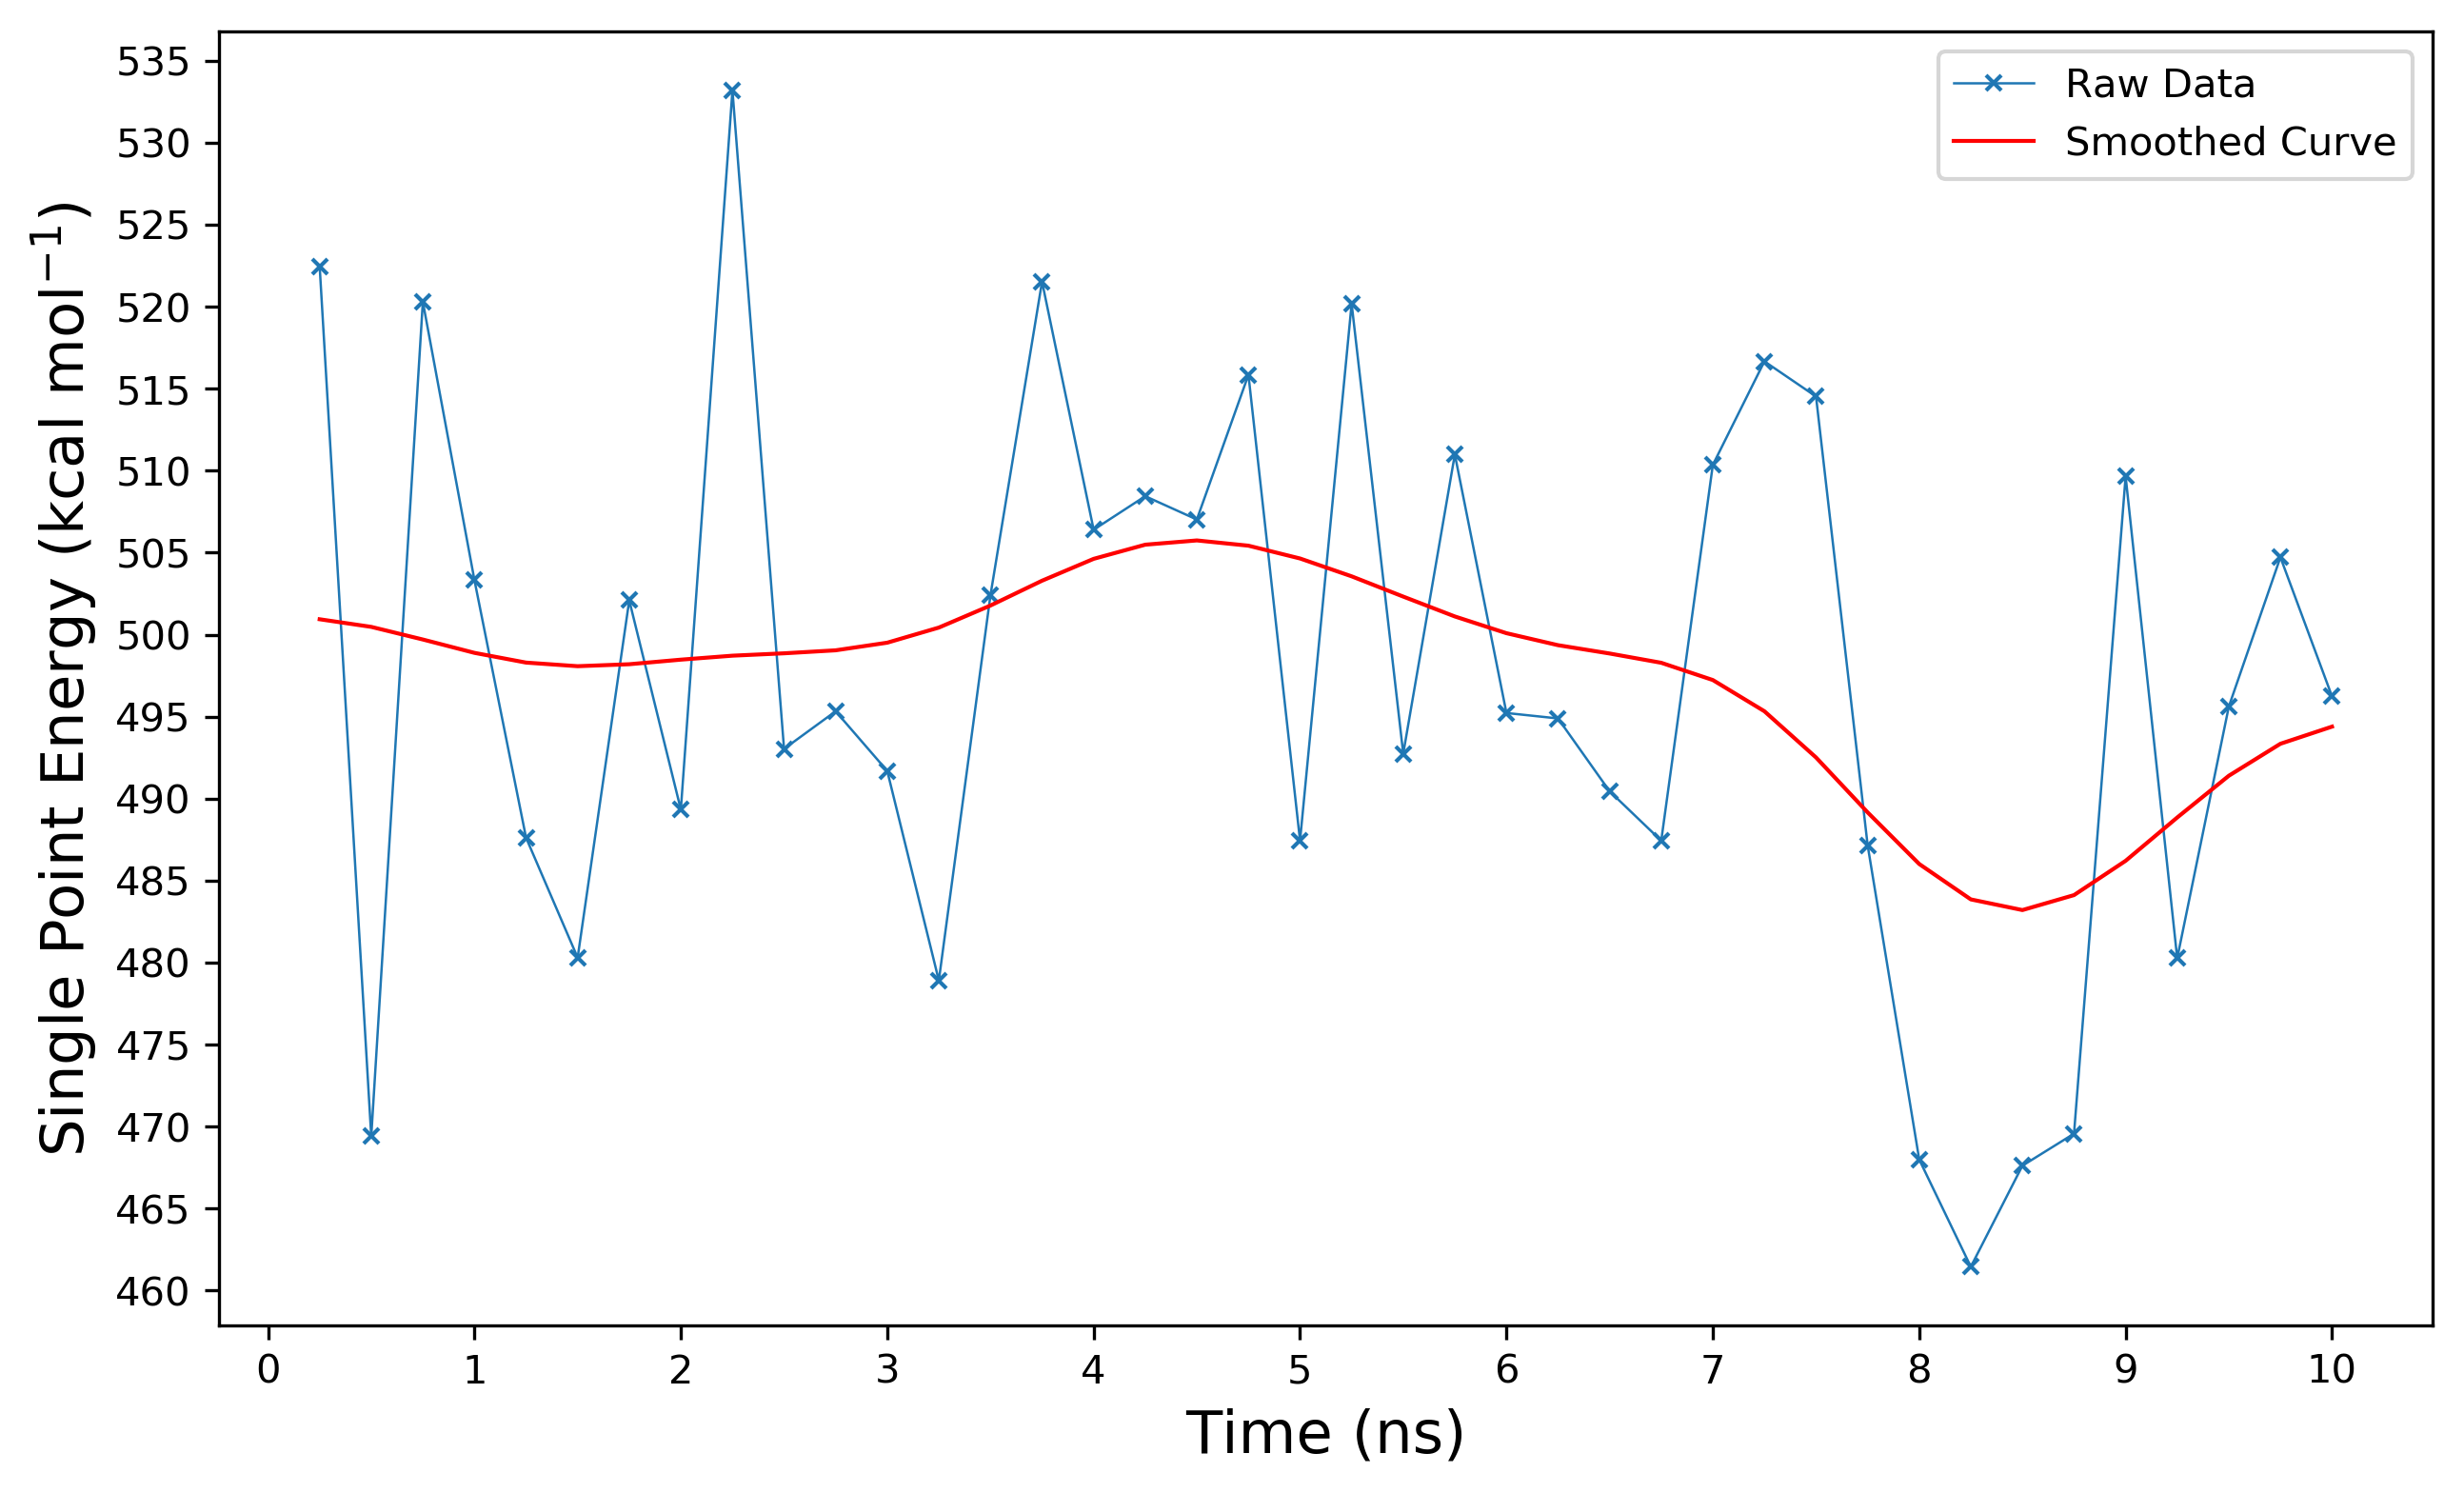

In [7]:
no_frames = 200
sim_length = 10
frames = (np.array(range(0, no_frames+1, 5)) / (no_frames/sim_length)).tolist()
SPE_energies_smooth = gaussian_filter1d(SPE_energies[1:], sigma=3)  # Increase sigma for more smoothing
figure, axes = plt.subplots(figsize=[10,6], dpi=300)

plot(frames[1:], SPE_energies[1:], marker='x', markersize=4, linewidth=0.6, label='Raw Data') # plot raw data
plot(frames[1:], SPE_energies_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
xlabel('Time (ns)',fontsize=15)
ylabel(r'Single Point Energy (kcal mol$^{-1}$)',fontsize=15)

axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
y_min = floor(min(SPE_energies[1:]) / 5) * 5  # Round down to nearest 5
y_max = ceil(max(SPE_energies[1:]) / 5) * 5   # Round up to nearest 5
axes.set_yticks(arange(y_min, y_max+1, 5))

legend()
show()